In [6]:
import pandas as pd  #loading all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import xgboost


In [2]:
df = pd.read_csv("/content/Distilled_2023_Yellow_Taxi_Trip_Data.txt")  #loading the dataset in the variable df

In [12]:
df.isnull().mean() * 100  #first checking with the null values of the data

,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000329
passenger_count,3.421323
trip_distance,0.000329
RatecodeID,3.421323
store_and_fwd_flag,3.421323
PULocationID,0.000329
DOLocationID,0.000329
payment_type,0.000329


In [10]:
df.shape  #checking the no. of rows and columns

(303596, 19)

In [15]:
df["airport_fee"] = df["airport_fee"].fillna(0)   #we have changed the missing values with the no. 0
df["congestion_surcharge"] = df["congestion_surcharge"].fillna(0)

In [16]:
df.isnull().sum()  #checked again and everything seems good

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,1
passenger_count,10387
trip_distance,1
RatecodeID,10387
store_and_fwd_flag,10387
PULocationID,1
DOLocationID,1
payment_type,1


In [17]:
df["passenger_count"].mean()  #the mean of the passenger count is 1.37 so we are replacing empty values with 1

np.float64(1.3719428803345055)

In [18]:
df["passenger_count"] = df["passenger_count"].fillna(1) #we have replaced the null values with 1

In [19]:
df.isnull().sum() #seems good

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,1
passenger_count,0
trip_distance,1
RatecodeID,10387
store_and_fwd_flag,10387
PULocationID,1
DOLocationID,1
payment_type,1


In [25]:
df["RatecodeID"] = df["RatecodeID"].fillna(99)  #we are replacing the empty values with 99 because we have done some research and got this values

In [24]:
df.drop(columns = ["store_and_fwd_flag"], inplace = True) #we are dropping the column

In [26]:
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,1
passenger_count,0
trip_distance,1
RatecodeID,0
PULocationID,1
DOLocationID,1
payment_type,1
fare_amount,1


In [27]:
df.dropna(how = "any", inplace = True)  #removed last null values where we were getting 1's

In [28]:
df.isnull().sum() #now it is clean and ready to go

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0


In [34]:
df = df.sample(frac = 1 , random_state = 432).reset_index(drop = True)  #here we shuffle the data

In [50]:
x = df.drop(columns = ["tip_amount","tpep_pickup_datetime","tpep_dropoff_datetime"])  #we are assigning the x features and y target columns to work with
y = df["tip_amount"]

In [51]:
from sklearn.model_selection import train_test_split  #we are going to split them using train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [52]:
#now the training starts

from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)



In [53]:
from sklearn.metrics import mean_squared_error  #this is telling that there is error of 1.14 in the actual tip , like give or take 1.144

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.1447270755071557


In [57]:
df.select_dtypes(include = "number").agg(["min","max","mean"]).T  #we find anomalies like negative tip amount and trip_distance is like going to the moon

,min,max,mean
VendorID,1.00,6.00,1.738929
passenger_count,0.00,9.00,1.359219
trip_distance,0.00,159017.60,4.746836
RatecodeID,1.00,99.00,4.977921
PULocationID,1.00,265.00,165.152265
DOLocationID,1.00,265.00,163.798976
payment_type,0.00,4.00,1.184502
fare_amount,-500.00,700.00,19.454478
extra,-7.50,12.50,1.553695
mta_tax,-0.50,3.00,0.485536


In [62]:
df = df[(df["trip_distance"] > 0.5) & (df["trip_distance"] < 100)] # we have fixed the trip distance issue

In [67]:
#we have removed the columns where there is negative value
numeric_cols = df.select_dtypes(include=np.number).columns

df_filtered = df[(df[numeric_cols] >= 0).all(axis=1)]

print(f"Original shape: {df.shape}")
print(f"Filtered shape: {df_filtered.shape}")

df = df_filtered

Original shape: (281891, 18)
Filtered shape: (281891, 18)


In [68]:
df.select_dtypes(include = "number").agg(["min","max","mean"]).T

,min,max,mean
VendorID,1.00,6.00,1.747370
passenger_count,0.00,9.00,1.365553
trip_distance,0.51,93.00,3.654712
RatecodeID,1.00,99.00,4.295384
PULocationID,1.00,265.00,164.906474
DOLocationID,1.00,265.00,163.479671
payment_type,0.00,4.00,1.157589
fare_amount,0.00,484.60,20.268174
extra,0.00,11.75,1.601219
mta_tax,0.00,0.80,0.496994


In [73]:
df = df.sample(frac = 1 , random_state = 432).reset_index(drop = True)

In [74]:
x = df.drop(columns = ["tip_amount","tpep_pickup_datetime","tpep_dropoff_datetime"])  #we are assigning the x features and y target columns to work with
y = df["tip_amount"]

In [75]:
from sklearn.model_selection import train_test_split  #we are going to split them using train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [76]:
from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [81]:
from sklearn.metrics import mean_squared_error  #this is telling that there is error of 1.14 in the actual tip , like give or take 1.144

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.9203342096601526


In [80]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
# cv=5 means 5-fold cross-validation
# scoring='neg_mean_squared_error' is used because cross_val_score maximizes the score,
# so we use the negative of the metric we want to minimize (MSE)
cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
mse_scores = -cv_scores

print("Cross-validation Mean Squared Error scores:", mse_scores)
print("Average Cross-validation MSE:", mse_scores.mean())

Cross-validation Mean Squared Error scores: [2.1898815  3.52950993 2.97377528 3.80314624 1.0905684 ]
Average Cross-validation MSE: 2.7173762676638202


Feature Importances:
payment_type             0.408473
total_amount             0.312321
fare_amount              0.071139
PULocationID             0.061225
RatecodeID               0.038178
tolls_amount             0.023813
extra                    0.013295
airport_fee              0.012295
mta_tax                  0.011923
DOLocationID             0.010328
trip_distance            0.010237
VendorID                 0.009514
congestion_surcharge     0.008133
passenger_count          0.007389
improvement_surcharge    0.001736
dtype: float32


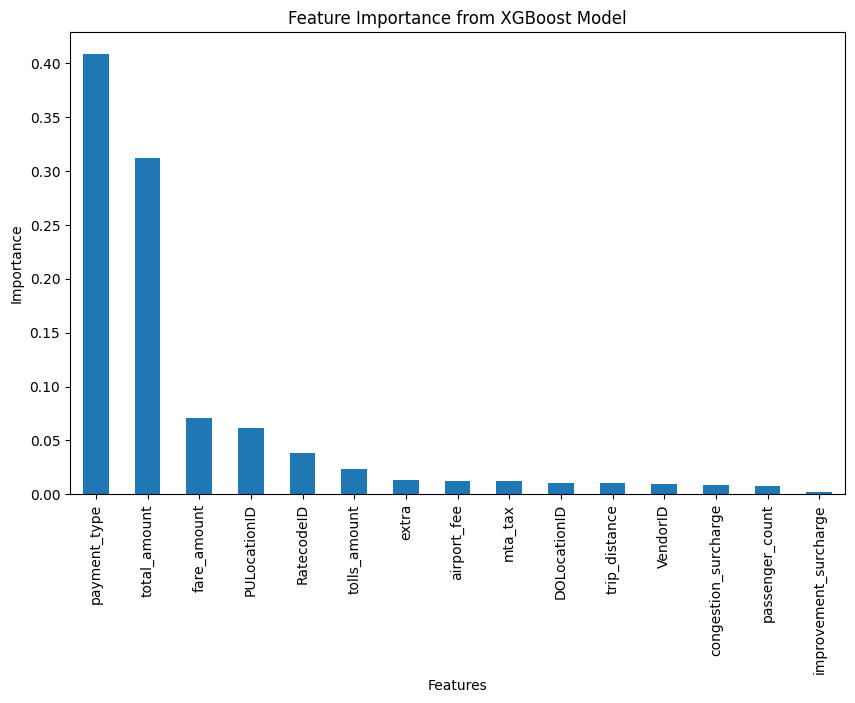

In [82]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = x_train.columns

# Create a pandas Series for better visualization
importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance in descending order
sorted_importance = importance_series.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:")
print(sorted_importance)

# Optionally, visualize the feature importances
plt.figure(figsize=(10, 6))
sorted_importance.plot(kind='bar')
plt.title('Feature Importance from XGBoost Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()